# BITAmin 11기 4차 정규세션 실습과제 (2023.03.15)

## **주제 : 선형 회귀**

실습 진행 전, 다음 코드를 실행해주세요.
모든 문제는 유의수준 5%를 가정합니다.

In [ ]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 통계 패키지
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.stats.stattools import durbin_watson

# 기계학습을 위한 패키지
import sklearn.linear_model
from sklearn.model_selection import train_test_split

# 시각화를 위한 패키지
from matplotlib import pyplot as plt
import seaborn as sns

# 그래프를 실제로 그리기 위한 설정
%matplotlib inline

# 경고 메세지를 무시합니다.
import warnings
warnings.filterwarnings('ignore')

# 다중공선성
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 실습 1 - 단순 선형 회귀

## Q1.

아래 데이터는 TV, 라디오, 신문에 광고를 했을때 상품이 얼마나 판매되었는지 정리한 자료이다.

데이터 분석을 통해 어떤 광고 방법이 상품 판매량 증가에 뚜렷한 상관관계를 갖는지 판단해보자.

**Q1-1. 데이터 불러오기**

'advertising.csv’를 불러오고, 이를 adv 변수에 저장하시오.

In [ ]:
adv=pd.read_csv('/content/drive/My Drive/advertising.csv',encoding='cp949')
adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


**Q1-2. 데이터에 대한 정보 확인**

 결측치 확인하고, 변수들의 타입을 확인해보시오. 확인하였다면, 이 데이터가 회귀분석 자료로 적합한지 타입 관련하여 설명하시오

In [ ]:
print(adv.isnull().sum())
adv.dtypes

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

회귀분석 자료로 적합한가?
답 : 모두 실수형 자료로 적합하다

**Q1-3. 히스토그램을 통한 데이터 분포 파악**

 4개 변수 각각의 히스토그램을 만들어보고, 로그를 활용한 분포 조정이 필요한 변수가 있는지 확인해보시오. 있다면 자연로그 적용하여 히스토그램 만들어보시오.

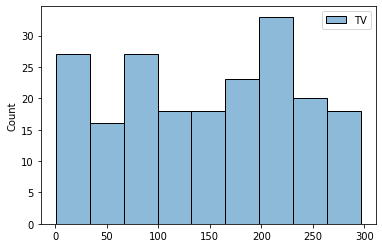

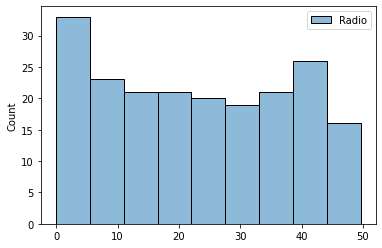

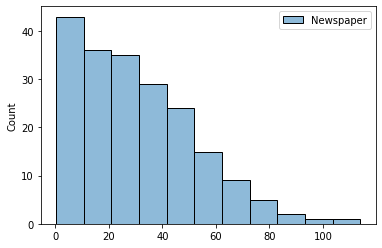

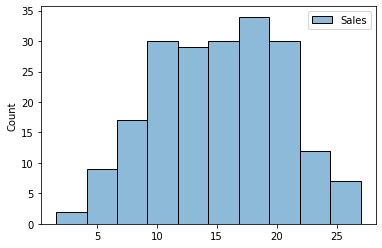

In [ ]:
for i in adv.columns:
   sns.histplot(adv[[i]])
   plt.show()

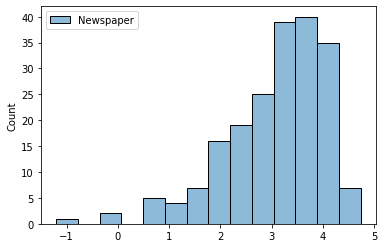

In [ ]:

sns.histplot(np.log(adv[['Newspaper']]))
plt.show()

**Q1-4. 산점도를 통한 선형관계 파악**

 종속변수(Sales)와 다른 변수들의 선형 관계를 산점도 그래프를 통해 판단해보시오.


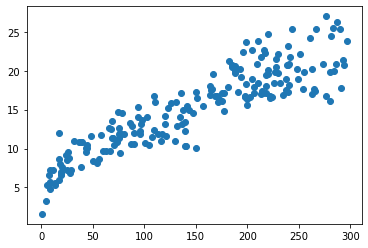

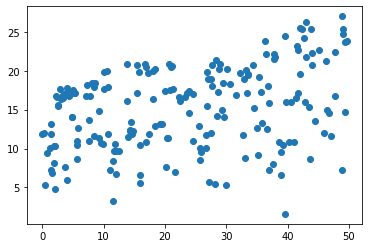

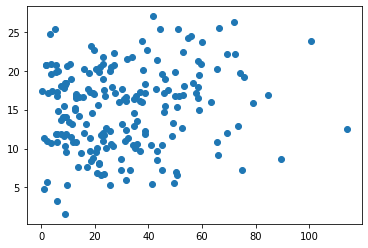

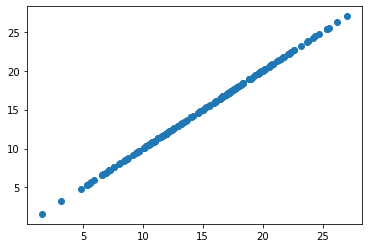

In [ ]:
for i in adv.columns:
   plt.scatter(x=adv[[i]],y=adv[['Sales']])
   plt.show()

 **Q1-5. 특정 독립변수와의 선형관계 확인**

 산점도 그래프로 판단된, 가장 상관관계 높은 변수와 ‘Sales’ 변수 간 선형관계를 확인하시오.

In [ ]:
np.corrcoef(adv['TV'],adv['Sales'])

array([[1.        , 0.90120791],
       [0.90120791, 1.        ]])

 **Q1-6. 통계학적 유의성 판단**

 상수항을 추가하고 이후 통계학적 유의성이 확보되는지 판단하시오.

In [ ]:
x=adv[['TV']]
y=adv[['Sales']]
x=sm.add_constant(x,has_constant='add')
model=sm.OLS(y,x)
r_model=model.fit()
r_model.summary()
#p-value가 0으로 유의수준보다 작기 때문에 유의성이 있다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           7.93e-74
Time:                        07:13:14   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.000       6.339       7.611
TV             0.0555      0.002     29.260      0.000       0.052       0.059
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.043
Skew:                          -0.018   Prob(JB):                        0.979
Kurtosis:                       2.938   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 실습 2 - 다중 선형 회귀

## Q2.
의료비에 영향을 미치는 여러가지 요소가 무엇인지 파악하려고 한다. 다음 물음에 답하시오.

**Q2-1. insurance.csv를 불러오고 region 열을 삭제 후 insurance 라는 이름의 변수에 저장하시오.**

**변수 설명**

age : 수혜자의 연령

sex : 보험계약자의 성별(female/male)
    
bmi : 신체에 대한 이해를 제공하는 체질량 지수. 몸무게를 키의 제곱으로 나눈 값.

children : 건강 보험이 적용되는 자녀 수/부양가족 수

smoker : 보험계약자의 흡연 여부(yes/no)
    
region : 수혜자의 미국 거주 지역(북동(northeast), 남동(southeast), 남서(southwest), 북서(northwest))
    
charges : 건강 보험에서 청구하는 개별 의료비용
    
(그 외의 변수에 대한 정보는 https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset?resource=download 참조)

In [ ]:
insurance=pd.read_csv('/content/drive/My Drive/insurance.csv',encoding='cp949')
insurance.drop(columns=['region'],inplace=True)

**Q2-2. insurance의 컬럼의 수와 데이터 타입을 출력하시오. 또한 첫 10행을 출력하시오.**

In [ ]:
insurance.info()
insurance.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
5,31,female,25.740,0,no,3756.62160
6,46,female,33.440,1,no,8240.58960
7,37,female,27.740,3,no,7281.50560
8,37,male,29.830,2,no,6406.41070
9,60,female,25.840,0,no,28923.13692


**Q2-3. 질적 설명 변수(sex, smoker)를 포함하고 있기 때문에 더미변수 형태로 변수를 변환시켜야한다. 판다스의 get_dummies() 함수를 이용하여 변수 변환을 진행하시오. (변경 내용이 insurance에 저장되어야함)**

In [ ]:
insurance=pd.get_dummies(insurance,columns=['sex','smoker'])

**Q2-4. 산점도를 그려서 변수들간의 상관관계를 파악하시오**

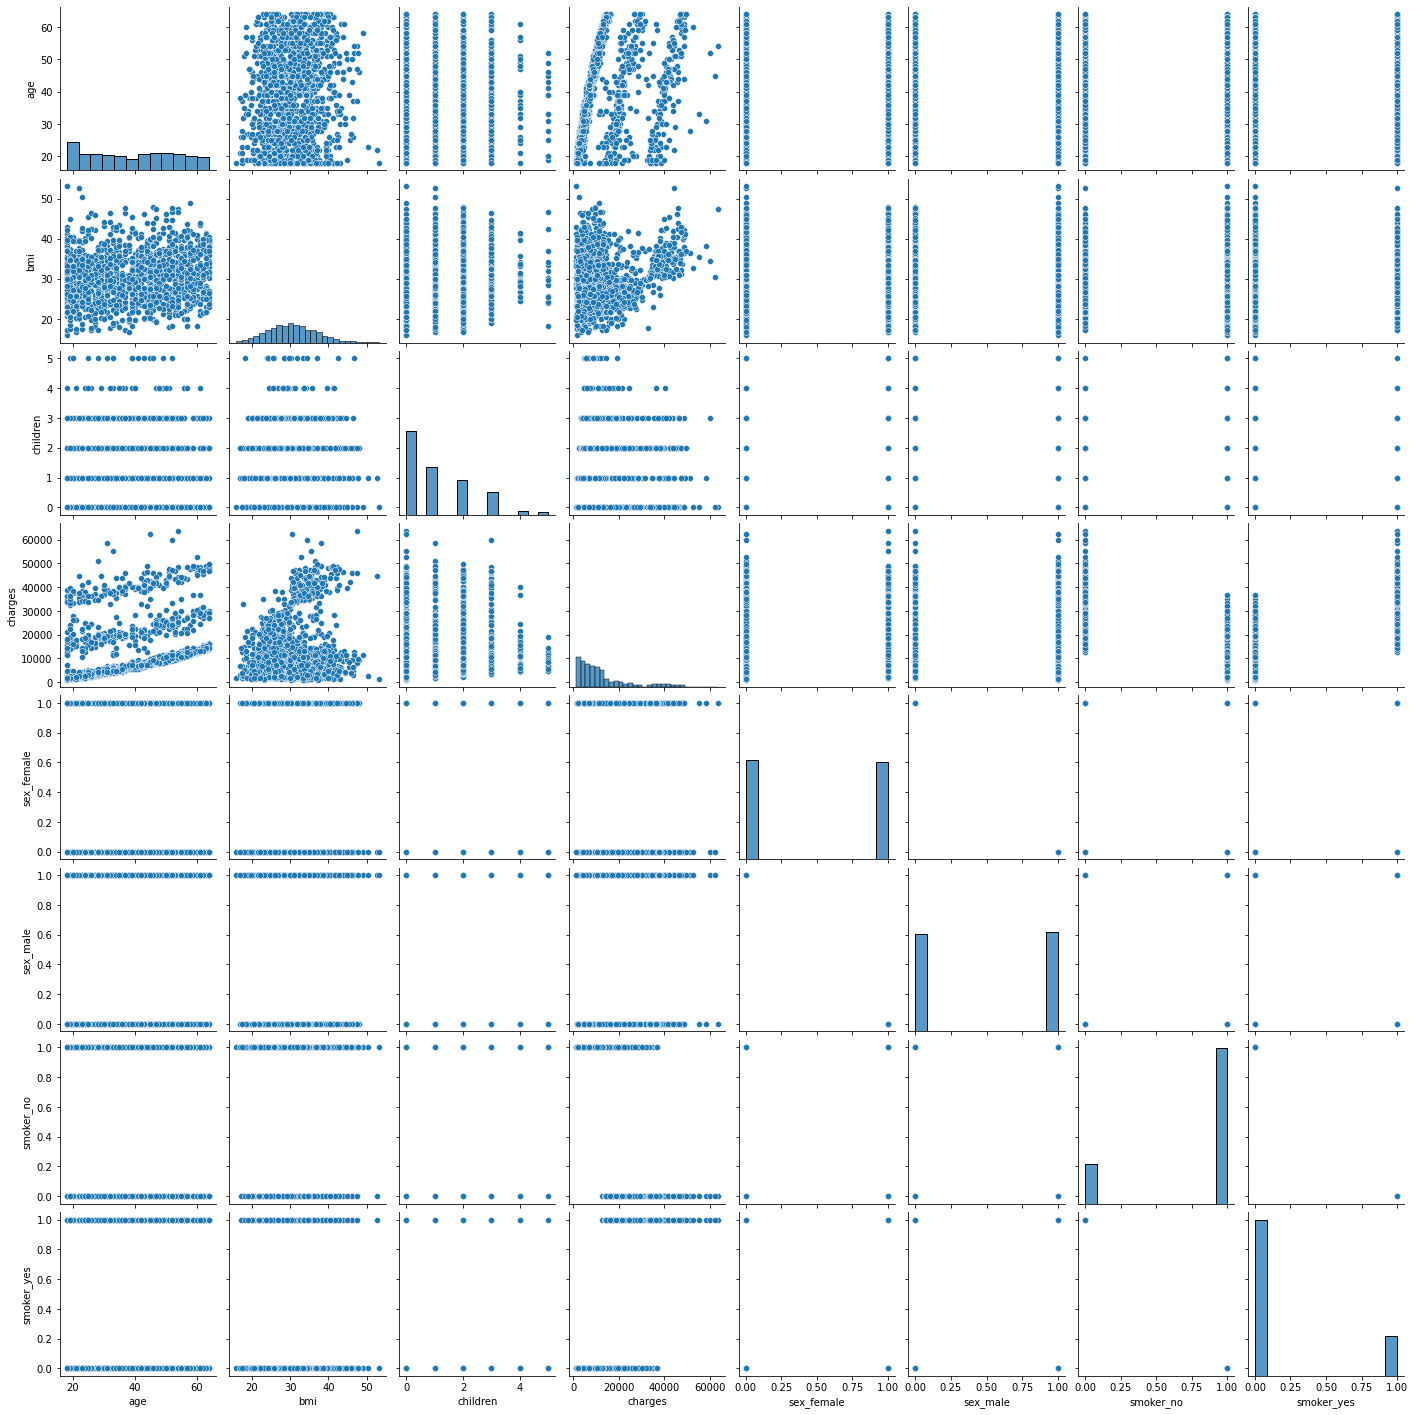

In [ ]:
sns.pairplot(insurance)

**Q2-5. charges 변수에 대한 히스토그램을 확인하고, 문제점에 대해 설명하시오. 또한 적절한 변환을 통해 정규분포 형태로 변환 하시오**

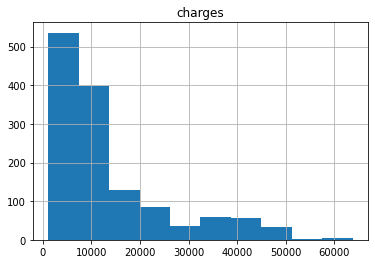

array([[<AxesSubplot:title={'center':'charges'}>]], dtype=object)

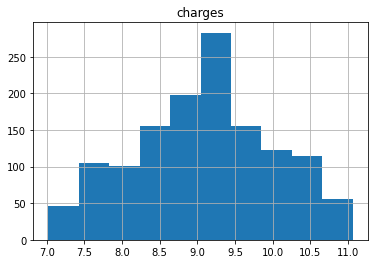

In [ ]:
insurance[['charges']].hist()
plt.show()
np.log(insurance[['charges']]).hist()

답 : 왼쪽에 데이터가 너무 치우쳐 있다(정규성x)

**Q2-6. insurance 데이터프레임의 charges 열을 자연로그를 취한 값으로 바꾸시오.**

In [ ]:
insurance[['charges']]=np.log(insurance[['charges']])

**Q2-7. charges를 종속 변수로, 나머지 변수를 독립 변수로 가지는 회귀식을 적합하여 다중 선형 회귀를 실시하시오. 단, 종속 변수는 자연로그를 취한 값이어야 한다.**

In [ ]:
df=sm.add_constant(insurance,has_constant='add')
x=df[df.columns.difference(['charges'])]
y=df.charges
model2=sm.OLS(y,x)
result_model=model2.fit()
result_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     861.5
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        07:14:06   Log-Likelihood:                -820.35
No. Observations:                1338   AIC:                             1653.
Df Residuals:                    1332   BIC:                             1684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0347      0.001     39.536      0.000       0.033       0.036
bmi            0.0109      0.002      5.394      0.000       0.007       0.015
children       0.1017      0.010     10.004      0.000       0.082       0.122
const          3.8749      0.035    111.129      0.000       3.806       3.943
sex_female     1.9749      0.021     93.548      0.000       1.934       2.016
sex_male       1.8999      0.022     88.151      0.000       1.858       1.942
smoker_no      1.1623      0.022     53.536      0.000       1.120       1.205
smoker_yes     2.7125      0.024    110.785      0.000       2.665       2.761
==============================================================================
Omnibus:                      452.170   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1604.926
Skew:                           1.639   Prob(JB):                         0.00
Kurtosis:                       7.248   Cond. No.                     3.47e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.92e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Q2-8. 결과를 보고 모형의 통계학적 유의성과 모형의 설명력에 대해 설명하시오**

답 : 모든 독립변수의 p value가 유의수준보다 작아 모델의 통계적 유의성이 있다
r-squared 값이 0.763으로 약76프로의 설명력을 갖는다.

**Q2-9.다음 절차를 따라서 변수의 다중공선성 문제를 확인하시오**

**1.insurance_vif 라는 이름의 데이터 프레임을 생성하시오**

In [ ]:
insurance_vif=pd.DataFrame()

**2.insurance_vif에 변수들의 VIF(분산팽창계수)를 vif라는 이름의 열을 생성하여 입력하시오.단 VIF는 소수 3번 째 자리까지 출력하시오**

In [ ]:
insurance_vif['vif']=np.round([variance_inflation_factor(insurance,i) for i in range(insurance.shape[1])],3)

**3.insurance_vif에 변수들의 이름을 feature라는 이름의 열을 생성하여 입력하시오**

In [ ]:
insurance_vif['features']=insurance.columns

**4.VIF는 주로 10보다 크면 다중공산성이 있다고 한다. insurance_vif 데이터프레임을 출력하고 다중공산성 문제가 있는 변수들을 확인하시오**

In [ ]:
insurance_vif.sort_values(by='vif',ascending=False)

,vif,features
4,inf,sex_female
5,inf,sex_male
6,inf,smoker_no
7,inf,smoker_yes
3,4.234,charges
0,2.206,age
2,1.078,children
1,1.037,bmi


답 :없다

# 실습 3 - 회귀모형의 가정 진단

## Q3.
회귀모형의 가정 진단을 위해 오차항의 정규성, 독립성, 등분산성을 확인하고자 한다.
실습 2의 insurance 데이터를 활용하여. 다음 물음에 답하시오.

**Q3-1. Q-Q플롯을 이용하여 오차항의 정규성 검정을 진행하시오. 그리고 그 결과에 따라 아래와 같은 형식으로 답을 출력하시오**


~이기 때문에 독립성을 (만족한다. 또는 만족하지 않는다.)

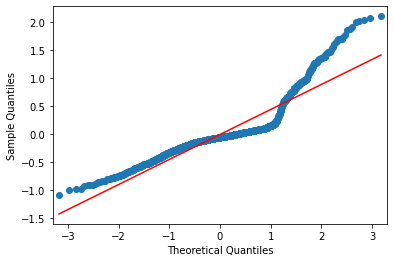

In [ ]:
qqplot=sm.qqplot(result_model.resid,line='s')

답 :QQplot이 빨간 직선에 많이 벗어났기 때문에 정규성을 만족하지 않는다.

**Q3-2.샤피로-윌크 검정을 이용하여 정규성 검정을 진행하시오. 그 결과에 따라 아래와 같은 형식으로 답을 출력하시오.**

p-value는 ~로 0.05보다 (작기 또는 크기) 때문에 정규성 검정을 (만족한다. 또는 만족하지 않는다.)

In [ ]:
shapiro=stats.shapiro(result_model.resid)
print(f'p-value는 {shapiro[1]:.4f}로 0.05보다 작기 때문에 정규성검정을 만족한다.')

p-value는 0.0000로 0.05보다 작기 때문에 정규성검정을 만족한다.


답 :

**Q3-3. ACF를 이용해 독립성 검정을 진행하시오. 그 결과에 따라 아래와 같은 형식으로 답을 출력하시오.**

~이기 때문에 독립성을 (만족한다. 또는 만족하지 않는다.)

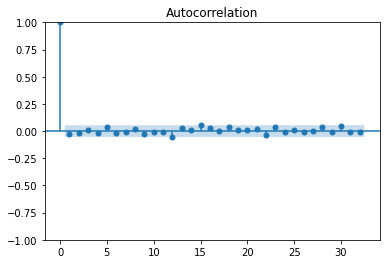

In [ ]:
sm.graphics.tsa.plot_acf(result_model.resid)
plt.show()

답 : 시차0이후로 파란 구간안에 점들이 속하므로 독립성을 만족한다.

**Q3-4.잔차 그래프를 통해 오차항의 등분산성 검정을 진행하시오.그 결과에 따라 아래와 같은 형식으로 답을 출력하시오.**

~이기 때문에 등분산성을 (만족한다. 또는 만족하지 않는다.)

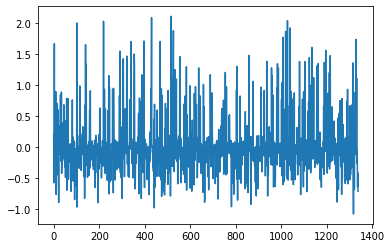

In [ ]:

result_model.resid.plot()
plt.show()

답 : 잔차 그래프가 모든 구간에서 추세등이 없이 균일하므로 등분산성을 만족한다.

# 실습 4

## Q4.
멜버른 부동산 매물의 가격에 영향을 미치는 요소가 무엇인지 파악하려고 한다. 다음 물음에 답하시오

**Q4-1. melb_data.csv를 불러오고 melb 변수에 저장한 뒤 각 컬럼별 기술통계량을 출력하시오.**

**변수 설명**

Rooms: 방의 개수

Price: 부동산 가격(단위: 호주 달러)

Type: 거주 형태

Distance: 시내로부터의 거리

Bathroom: 화장실 수

Car: 주차장 수

Landsize: 토지 면적

(그 외의 변수에 대한 정보는 https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot?resource=download 참조)

In [ ]:
melb=pd.read_csv('/content/drive/My Drive/melb_data.csv',encoding='cp949')
melb.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


**Q4-2. Price를 종속변수로 설정하고 회귀분석을 시도하려고 한다. Price, Type, Rooms, Distance, Bathroom, Landsize 컬럼만 남기고 모두 삭제한 후, 산점도를 그려 독립 변수들 사이에 상관 관계가 없는지 확인하자.**

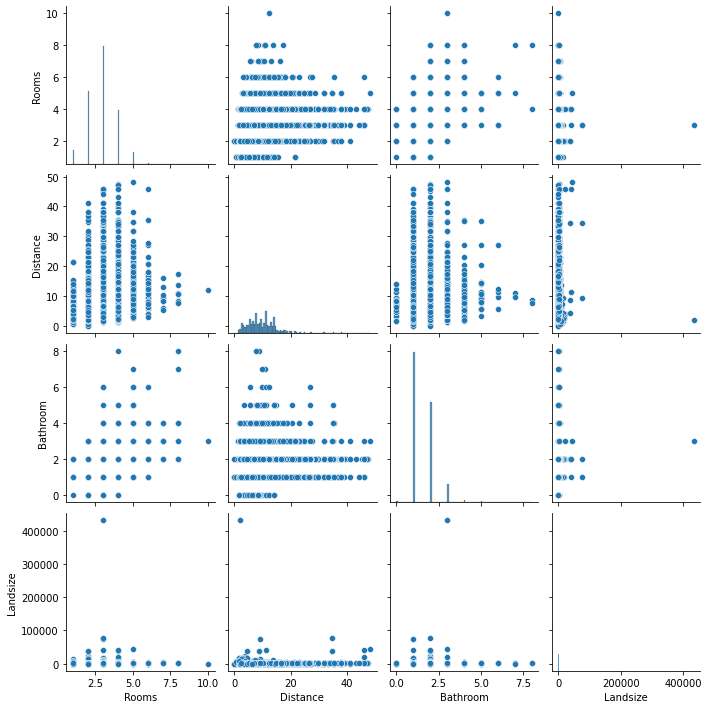

In [ ]:
melb=melb[['Price', 'Type', 'Rooms', 'Distance', 'Bathroom', 'Landsize']]
sns.pairplot(melb.drop(columns=['Price']))

**Q4-3. Type은 질적 설명 변수이다. Type에 몇 개의 범주가 포함되어 있는지 확인하고, pd.get_dummies()를 이용해 dummy variable 처리한 후 확인하라(변경 내용이 melb에 저장되어야 함). 교재 261페이지의 dummy variable 설명과 어떤 점이 다른지 서술하라.**

In [ ]:
print(melb[['Type']].value_counts())
melb=pd.get_dummies(melb,columns=['Type'])
melb

Type
h       9449
u       3017
t       1114
dtype: int64


,Price,Rooms,Distance,Bathroom,Landsize,Type_h,Type_t,Type_u
0,1480000.0,2,2.5,1.0,202.0,1,0,0
1,1035000.0,2,2.5,1.0,156.0,1,0,0
2,1465000.0,3,2.5,2.0,134.0,1,0,0
3,850000.0,3,2.5,2.0,94.0,1,0,0
4,1600000.0,4,2.5,1.0,120.0,1,0,0
...,...,...,...,...,...,...,...,...
13575,1245000.0,4,16.7,2.0,652.0,1,0,0
13576,1031000.0,3,6.8,2.0,333.0,1,0,0
13577,1170000.0,3,6.8,2.0,436.0,1,0,0
13578,2500000.0,4,6.8,1.0,866.0,1,0,0


답 :추가 생성 변수의 수가 명목형 변수 그룹수 보다 1개 작다 했는데 위의 코드에서는 3개의 그룹수를 가지지만 똑같이 3개의 변수가 생성되었다.

**Q4-4. Price를 종속 변수로, 나머지 변수를 독립 변수로 가지는 회귀식을 적합하라.**

In [ ]:
melb_r=sm.add_constant(melb,has_constant='add')
x=melb_r[melb_r.columns.drop('Price')]
y=melb_r.Price
model3 = sm.OLS(y,x)
r_model3 = model3.fit()
r_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     1802.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        07:19:51   Log-Likelihood:            -1.9683e+05
No. Observations:               13580   AIC:                         3.937e+05
Df Residuals:                   13573   BIC:                         3.937e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.794e+05   1.18e+04     23.684      0.000    2.56e+05    3.02e+05
Rooms       1.844e+05   6406.990     28.786      0.000    1.72e+05    1.97e+05
Distance   -3.752e+04    734.010    -51.122      0.000    -3.9e+04   -3.61e+04
Bathroom     2.69e+05   7525.237     35.750      0.000    2.54e+05    2.84e+05
Landsize       3.5943      1.027      3.500      0.000       1.581       5.608
Type_h      3.375e+05   8688.665     38.846      0.000     3.2e+05    3.55e+05
Type_t      1.285e+04    1.2e+04      1.069      0.285   -1.07e+04    3.64e+04
Type_u     -7.102e+04   7560.554     -9.393      0.000   -8.58e+04   -5.62e+04
==============================================================================
Omnibus:                     7724.955   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171020.758
Skew:                           2.289   Prob(JB):                         0.00
Kurtosis:                      19.771   Cond. No.                     8.85e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.81e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Q4-5. summary()의 출력 결과를 보고 총 변동 중 모델을 통해 설명될 수 있는 변동의 비율이 얼마나 되는지 퍼센티지로 서술하라.**

답 : R-squared 값이 0.443으로 약 44% 설명된다.

**Q4-6. Type 변수의 t그룹이 모델에 유의미한 영향을 미친다고 할 수 있는지 유의수준 0.05에서 검정하라.**

답 : p-value가 0.05보다 크기 때문에 유의하지 않다

# 실습5

## 단순선형회귀

**Q5-1. 데이터를 가져오기 위해 toluca_company_dataset 데이터셋을 다운로드 받은 후 \
csv 파일을 불러와 df에 저장한다.(Lot_size : 제품크기, Work_hours : 작업시간)**

In [ ]:
# csv 파일을 불러와서 df에 담습니다.

df=pd.read_csv('/content/drive/My Drive/toluca_company_dataset.csv',encoding='cp949')

# index를 1로 시작하도록 수정합니다.
df.set_index(np.arange(1,len(df)+1),inplace=True)

**Q5-2.데이터 결측치 확인 및 데이터에 대한 정보 확인 (`info()` 함수 사용)**

In [ ]:
#결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Lot_size    25 non-null     int64
 1   Work_hours  25 non-null     int64
dtypes: int64(2)
memory usage: 600.0 bytes


In [ ]:
#데이터 정보 확인


**Q5-3. 기술통계량, 중간값, 결측치, 왜도 첨도 구하기**

In [ ]:
print(df.describe())
print(df.skew())
print(df.kurt())

         Lot_size  Work_hours
count   25.000000   25.000000
mean    70.000000  312.280000
std     28.722813  113.137645
min     20.000000  113.000000
25%     50.000000  224.000000
50%     70.000000  342.000000
75%     90.000000  389.000000
max    120.000000  546.000000
Lot_size     -0.103208
Work_hours   -0.078076
dtype: float64
Lot_size     -1.079411
Work_hours   -0.632586
dtype: float64


**Q5-4. 히스토그램과 산점도를 그려 변수 별 분포 확인**

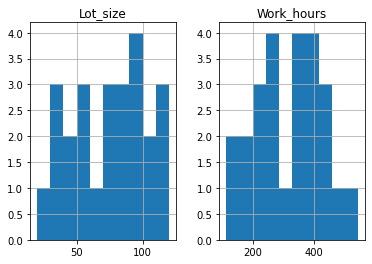

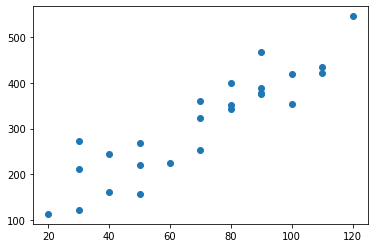

In [ ]:
df.hist()
plt.show()
plt.scatter(df[['Lot_size']],df[['Work_hours']])
plt.xlabel='Lot_size'
plt.ylabel='Work_hours'
plt.show()

**Q5-5. 피어슨 상관계수 구하기**

상관계수: 0.906385




In [ ]:
df.corr()

,Lot_size,Work_hours
Lot_size,1.000000,0.906385
Work_hours,0.906385,1.000000


**Q5-6. matplotlib과 단순선형회귀 그래프를 그린다.(산점도와 단순선형회귀 추세선이 포함된 그래프 만들기)**

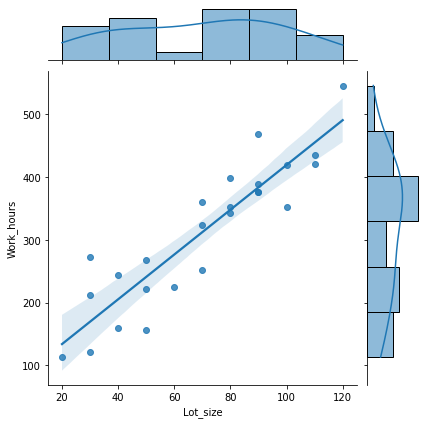

In [ ]:
sns.jointplot(x=df['Lot_size'],y=df['Work_hours'],kind='reg')

**Q5-7. 종속 변수를 Work_hours로 두고 회귀분석 진행 후 결과 해석**

(1) 결정계수 : 0.822

(2) 조정된 결정계수 : 0.814

(3) 결정계수의 정의 : 총변동중에 모델이 설명하는 변동의 비율

(4) 해당 모델이 통계적 유의성이 있는가? (유의수준 0.05)
: 통계적 유의성이 있다.

(5) 결과를 보고 이 모델의 선형회귀분석 추세선 식을 구하시오
답: y = 62.3659 + 3.5702x

(6) 제품 크기가 80 일 때 예상되는 소요시간은 얼마인가? (polyfit() 활용하여 계산)
답:

In [ ]:
#ployfit()

In [ ]:
x=df[['Lot_size']]
y=df[['Work_hours']]
x=sm.add_constant(x,has_constant='add')
model5=sm.OLS(y,x)
r_model5=model5.fit()
r_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Work_hours   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     105.9
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           4.45e-10
Time:                        07:40:06   Log-Likelihood:                -131.64
No. Observations:                  25   AIC:                             267.3
Df Residuals:                      23   BIC:                             269.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3659     26.177      2.382      0.026       8.214     116.518
Lot_size       3.5702      0.347     10.290      0.000       2.852       4.288
==============================================================================
Omnibus:                        0.608   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.684
Skew:                           0.298   Prob(JB):                        0.710
Kurtosis:                       2.450   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 실습6

## 단순선형회귀 기본가정진단

**Q6-1. ACF 그래프를 이용하여 오차항의 독립성을 진단하시오**

\

답: 시차 1부터 점들이 파란 구간안에 들어오므로 독립성이 있다.

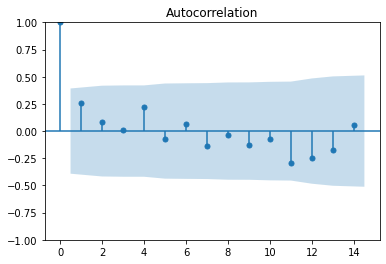

In [ ]:
sm.graphics.tsa.plot_acf(r_model5.resid)
plt.show()

**Q6-2. 위 데이터의 오차항이 등분산성을 만족하는지 보이고 그렇게 생각한 이유를 서술하시오.**



답: 오차항 그래프가 추세나 패턴을 갖는 것으로 보이지 않아 등분산성을 만족한다.

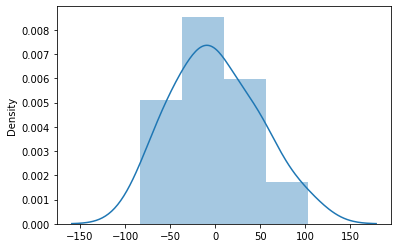

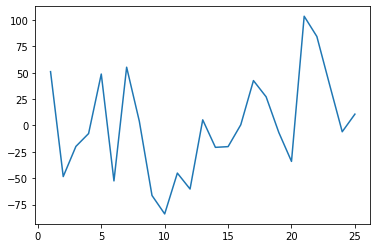

In [ ]:
sns.distplot(r_model5.resid)
plt.show()
r_model5.resid.plot()
plt.show()

**Q6-3. Q-Q 플롯을 이용하여 오차항의 정규성을 검정하시오**

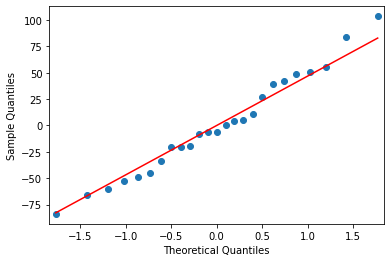

In [ ]:
qqplot=sm.qqplot(r_model5.resid,line='s')

# 실습7

### 추가 설명:

1) mpg: 연비

2) cylinders: 실린더 개수

3) displacement: 배기량

4) horsepower: 마력

5) weight: 무게

6) acceleration: 엔진이 초당 얻을 수 있는 가속력

7) model year: 출시 년도

8) origin: 제조 장소(1: 미국 USA, 2: 유럽 EU, 3: 일본 JPN)

9) car name: 자동차 이름


## 다중선형회귀

**Q7-1. auto-mpg 데이터를 불러와 df 변수에 저장하세요.**

### column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

### pd.read_csv('data/auto-mpg.data', names = column_names, na_values ='?', comment ='\t', sep=' ', skipinitialspace = True)

In [ ]:
df=column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
df=pd.read_csv('/content/drive/My Drive/auto-mpg.data', names = column_names, na_values ='?', comment ='\t', sep=' ', skipinitialspace = True)

**Q7-2. df 중 데이터가 누락된 행이 있는지 확인하고, 있다면 누락된 행을 삭제하세요.**

In [ ]:
df.info()
df.drop(columns=['Horsepower'],inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


**Q7-3. 범주형인 "Origin" 열을 원-핫 인코딩을 통해 수치형으로 변환하세요.**

(Hint :

origin = df.pop('Origin')

dataset['USA'] = (origin == 1)*1.0

dataset['Europe'] = ...

dataset['Japan'] = ...

...)

In [ ]:
pd.get_dummies(df,columns=['Origin'])

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin_1,Origin_2,Origin_3
0,18.0,8,307.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,2625.0,18.6,82,1,0,0


**Q7-4. 모든 독립 변수를 사용하여 다중 선형 회귀분석을 진행하고, OLS Regression Results를 분석하세요**

In [ ]:
df_r2=sm.add_constant(df,has_constant='add')
features=list(df_r2.columns.difference(['MPG']))
x=df_r2[features]
y=df_r2.MPG


In [ ]:
model7 = sm.OLS(y,x)
r_model7 = model7.fit()
r_model7.summary()
#모델 설명력: 81.8% 모델은 유효하며 Cylinders를 제외한 변수는 통계적으로 유의하다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     298.0
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          1.82e-142
Time:                        08:11:44   Log-Likelihood:                -1040.7
No. Observations:                 398   AIC:                             2095.
Df Residuals:                     391   BIC:                             2123.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Acceleration     0.1520      0.077      1.966      0.050    1.31e-05       0.304
Cylinders       -0.3848      0.320     -1.204      0.229      -1.013       0.244
Displacement     0.0171      0.007      2.371      0.018       0.003       0.031
Model Year       0.7659      0.049     15.541      0.000       0.669       0.863
Origin           1.3691      0.269      5.086      0.000       0.840       1.898
Weight          -0.0070      0.001    -12.031      0.000      -0.008      -0.006
const          -19.7558      4.140     -4.772      0.000     -27.896     -11.616
==============================================================================
Omnibus:                       29.660   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.068
Skew:                           0.500   Prob(JB):                     3.65e-11
Kurtosis:                       4.377   Cond. No.                     7.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Q7-5. 다중공선성 문제가 발생하는지 확인하세요. (VIF 확인)**

In [ ]:
df_V=pd.DataFrame()
df_V['VIF']=np.round([variance_inflation_factor(df_r2.values,i) for i in range(df_r2.shape[1])],2)
df_V['features']=df_r2.columns
df_V

,VIF,features
0,648.63,const
1,5.57,MPG
2,10.58,Cylinders
3,20.35,Displacement
4,11.72,Weight
5,1.64,Acceleration
6,1.92,Model Year
7,1.77,Origin


**Q7-6. 다중공선성 문제가 발생한다면 VIF가 높은 변수를 삭제/선택하여 다중 선형 회귀분석을 진행하고, OLS Regression Results를 분석하세요.**

In [ ]:
df_r2=sm.add_constant(df,has_constant='add')
features=list(df_r2.columns.difference(['MPG','Cylinders','Displacement','Weight']))
x=df_r2[features]
y=df_r2.MPG
model7_2 = sm.OLS(y,x)
r_model7_2 = model7_2.fit()
r_model7_2.summary()
#모델 설명력: 58.6%, 모델은 유효하며 모든 변수는 통계적으로 유의하다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     188.7
Date:                Mon, 13 Mar 2023   Prob (F-statistic):           7.65e-76
Time:                        08:20:54   Log-Likelihood:                -1205.3
No. Observations:                 398   AIC:                             2419.
Df Residuals:                     394   BIC:                             2435.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Acceleration     0.5730      0.097      5.918      0.000       0.383       0.763
Model Year       0.9325      0.072     12.979      0.000       0.791       1.074
Origin           4.3086      0.324     13.293      0.000       3.671       4.946
const          -63.0598      5.211    -12.102      0.000     -73.304     -52.815
==============================================================================
Omnibus:                       14.360   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.334
Skew:                           0.472   Prob(JB):                     0.000468
Kurtosis:                       2.821   Cond. No.                     1.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Q7-7. 다중공선성 문제가 완화되었는지 확인하세요. (VIF 확인)**

In [ ]:
df_V2=pd.DataFrame()
df_V2['VIF']=np.round([variance_inflation_factor(df_r2.drop(columns=['Cylinders','Displacement','Weight']).values,i) for i in range(df_r2.drop(columns=['Cylinders','Displacement','Weight']).shape[1])],2)
df_V2['features']=df_r2.drop(columns=['Cylinders','Displacement','Weight']).columns
df_V2
#다중공선성 문제가 완화되었다.

,VIF,features
0,586.83,const
1,2.44,MPG
2,1.22,Acceleration
3,1.58,Model Year
4,1.54,Origin


# 실습8

## 위 다중 회귀 모델의 가정을 진단해보자.

**Q8-1. 선형회귀의 4가지 가정**

 선형 회귀 모델의 4가지 가정을 작성하시오.

1. 선형성

2. 오차항의 독립성

3. 오차항의 등분산성

4. 오차항의 정규성

## 정규성 진단

**Q8-2. Q-Q plot을 통해 정규성을 진단하고, 결과를 해석하시오.**


\

결과: 거의 모든 점들이 직선위에 있으므로 정규성을 가진다

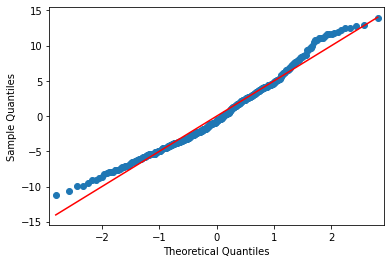

In [ ]:
qqplot = sm.qqplot(r_model7_2.resid,line='s')

**Q8-3. scatter plot을 활용한 잔차 패턴을 통해 정규성을 진단하시오**

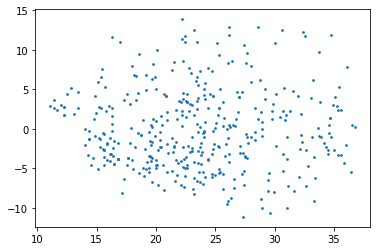

In [ ]:
fit = r_model7_2.predict()
resid=r_model7_2.resid
pred = r_model7_2.predict(x)
fig = plt.scatter(pred,resid,s=3)
plt.xlabel='Fitted Values'
plt.ylabel='Residual'
#잔차가 x값에 상관없이 균등하다

**Q8-4. Shapiro-Wilk 통해 정규성을 검정하시오. (유의수준 0.05)**

In [ ]:
shap = stats.shapiro(r_model7_2.resid)
print(f'p-value:{shap[1]:.4f}')
#정규성을 만족한다.

p-value:0.0000


## 독립성 진단

**Q8-5. 잔차 그래프를 통해 독립성을 진단하고, 결과를 해석하시오**

\

결과:

<AxesSubplot:>

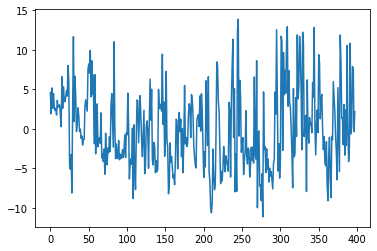

In [ ]:
r_model7_2.resid.plot()
#잔차가 특별한 패턴이나 추세없이 균등하므로 독립이다.

**Q8-6. ACF를 통해 독립성을 진단하시오.**

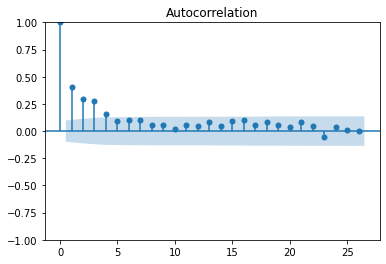

In [ ]:
sm.graphics.tsa.plot_acf(r_model7_2.resid)
plt.show()
#ACF값이 빠르게 감소해서 시차5 이후 시점부터 파란구간안에 들어가므로 독립이다.

## 등분산성 진단

**Q8-7. 잔차 그래프를 통해 등분산성을 진단하시오.**

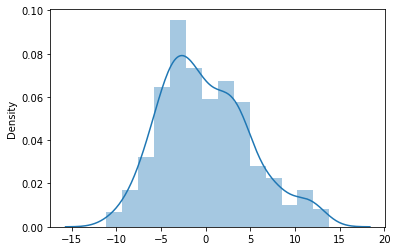

<AxesSubplot:>

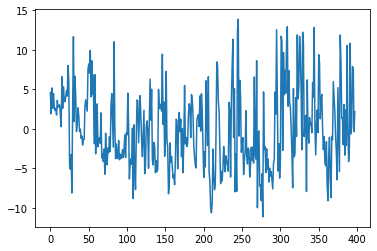

In [ ]:
sns.distplot(r_model7_2.resid)
plt.show()
r_model7_2.resid.plot()
#등분산성을 만족하는지 확실하게 판단하기 어렵다.

<등분산성 검정 : Breusch-Pagan 검정>

_, p-value, _, _ = sms.het_breuschpagan(model.resid, model.exog)

위 model 부분에 다중 선형회귀 model의 이름을 넣어 등분산성 검정을 시행해볼 수 있다.

**Q8-8. 귀무가설과 대립가설을 세운 후, 유의수준 0.05를 기준으로 검정하시오.**


\


귀무가설: 오차항이 등분산성을 가진다

대립가설: 오차항이 등분산성을 가지지 않는다

결과:p-value가 유의수준보다 작으므로 귀무가설을 기각하고 등분산성을 가지지 않는다고 판단한다.

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
# Breusch-Pagan 검정 수행
_, p_value, _, _ = het_breuschpagan(r_model7_2.resid, r_model7_2.model.exog)

print('Breusch-Pagan 검정 결과')
print(f'검정 통계량: {het_breuschpagan(r_model7_2.resid, r_model7_2.model.exog)[0]}')
print(f'p-value: {p_value}')

Breusch-Pagan 검정 결과
검정 통계량: 13.9601258604314
p-value: 0.002959933778197235
